



# Laboratorio 1: Acceso a datos mediante pandas

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web enlazada en el campus virtual, y de título "Países por población: pasado, presente y futuro" se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de panda, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
 

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos panda
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

In [1]:
# comando IPython para preparar el cuaderno para matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Extraer las tablas a partir de un documento html de la Wikipedia
Utilizaremos el método read_html() de la librería pandas para leer las tablas que hay en el fichero html

In [2]:
# Ojo, en este documento html el separador de miles es un punto
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population"

# Recogemos los datos en la variable tablas
tablas = pd.read_html(url, attrs={"class": "sortable"})

# Imprimimos el número de tablas que hemos leído mediante la función len(). Deberían ser 3.
len(tablas)

3

## Construimos una sola tabla con la información de población
Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas join(), merge(), o concat(), extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método head() para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [3]:
# Fusionamos los DataFrames en una sola tabla segun la fila "Country (or dependent territory)"
# Con la opcion how="outer" nos aseguramos de que aparezcan todos los paises únicos
datos = pd.merge(tablas[0], tablas[1], on="Country (or dependent territory)", how="outer")
datos = pd.merge(datos, tablas[2], on="Country (or dependent territory)", how="outer")

# Establecemos la columna "Country (or dependent territory)" como índice
datos.set_index("Country (or dependent territory)", inplace=True)

# Imprimimos las primeras filas
print(datos.head())

                                  1950  1955   %_x   1960  %.1_x   1965  \
Country (or dependent territory)                                          
Afghanistan                       8151  8892  1.76   9830   2.03  10998   
Albania                           1228  1393  2.56   1624   3.12   1884   
Algeria                           8893  9842  2.05  10910   2.08  11964   
American Samoa                      20    20  0.72     21   0.20     25   
Andorra                              7     7  0.04      9   6.28     14   

                                  %.2_x   1970  %.3_x   1975  ...   2030  \
Country (or dependent territory)                              ...          
Afghanistan                        2.27  12431   2.48  14133  ...  45665   
Albania                            3.02   2157   2.74   2402  ...   3103   
Algeria                            1.86  13932   3.09  16141  ...  48149   
American Samoa                     4.23     28   2.08     30  ...     53   
Andorra           

In [4]:
# Generamos una lista con la información almacenada en las columnas mediante list()
datos_columnas = datos.columns
lista_columnas = []
for columna in datos_columnas:
    lista_columnas.append(list(datos[columna]))

# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric() 
# Usamos la noción 'list comprehension' por sencillez y claridad
columnas_anos = [col for col in datos_columnas if col.isnumeric()]


# Leemos la tabla por fechas y la almacenamos para su uso. Imprimimos para verificar que es correcto
datos_por_fechas = datos[columnas_anos]
print(datos_por_fechas)

                                     1950     1955     1960     1965     1970  \
Country (or dependent territory)                                                
Afghanistan                          8151     8892     9830    10998    12431   
Albania                              1228     1393     1624     1884     2157   
Algeria                              8893     9842    10910    11964    13932   
American Samoa                         20       20       21       25       28   
Andorra                                 7        7        9       14       20   
...                                   ...      ...      ...      ...      ...   
Western Sahara                         10       16       28       50       90   
Yemen                                4778     5266     5872     6511     7099   
Zambia                               2554     2870     3255     3695     4241   
Zimbabwe                             2854     3410     4011     4686     5515   
World                       

## Algunas funciones de acceso a datos para una trama de pandas
Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1
Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025.

In [5]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc
subtabla_loc = datos_por_fechas.loc[['Germany', 'Andorra', 'Angola'], ['2015', '2020', '2025']]
print("subtabla\n",subtabla_loc)

subtabla
                                      2015   2020   2025
Country (or dependent territory)                       
Germany                           80855.0  82983  80025
Andorra                              86.0     86     86
Angola                            19626.0  22485  25674


### Ejercicio 2
Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9.

In [6]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc
subtabla_iloc = datos_por_fechas.iloc[2:8, 4:9]
print("subtabla\n",subtabla_iloc)

subtabla
                                    1970   1975   1980     1985     1990
Country (or dependent territory)                                       
Algeria                           13932  16141  18807  22009.0  25191.0
American Samoa                       28     30     33     39.0     48.0
Andorra                              20     27     34     45.0     53.0
Angola                             5606   6051   7206   8390.0   9486.0
Anguilla                              7      7      7      7.0      9.0
Antigua and Barbuda                  66     69     69     65.0     65.0


### Ejercicio 3
Imprimir la columna correspondiente al año 1955.

In [7]:
# Creamos una columna mediante selección por el título de la columna
columna_1995 = datos_por_fechas['1955']
print("Población de 1955\n",columna_1995)

Población de 1955
 Country (or dependent territory)
Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
Yemen                5266
Zambia               2870
Zimbabwe             3410
World             2782099
Name: 1955, Length: 228, dtype: int64


### Ejercicio 4
Imprimir los datos de la fila número 15.

In [8]:
# Seleccionamos una fila mediante la opción .iloc
columna_iloc = datos_por_fechas.iloc[14]
print("fila\n",columna_iloc)

fila
 1950     71.0
1955     88.0
1960    113.0
1965    140.0
1970    171.0
1975    190.0
1980    210.0
1985    229.0
1990    246.0
1995    266.0
2000    283.0
2005    297.0
2010    311.0
2015    325.0
2020    338.0
2025    350.0
2030    359.0
2035    365.0
2040    369.0
2045    372.0
2050    372.0
Name: Bahamas, dtype: float64


### Ejercicio 5
Imprimir la población de Barbados en 1995.

In [9]:
# Seleccionamos una celda mediante la opción .loc
print("Barbados\n",datos_por_fechas.loc['Barbados','1995'])

Barbados
 268.0


### Ejercicio 6
Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [10]:
# Utilizamos la función drop() para eliminar los valores totales mundiales
# Lo envolvemos en un if para no tener error al recargar la celda
if 'World' in datos_por_fechas.index:
    datos_por_fechas = datos_por_fechas.drop('World')

In [11]:
# Utilizamos la función max() para calcular el máximo
print(datos_por_fechas['1975'].max())

# Utilizamos idxmax() para identificar el país que corresponde al valor máximo
print(datos_por_fechas['1975'].idxmax())

920295
China


### Ejercicio 7
Imprimir los nombres de las filas.

In [12]:
# Utilizamos la opción .index
print("paises",datos_por_fechas.index)

paises Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country (or dependent territory)', length=227)


## Dibujar la población de 4 países en un año
Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando las librerías matplotlib.

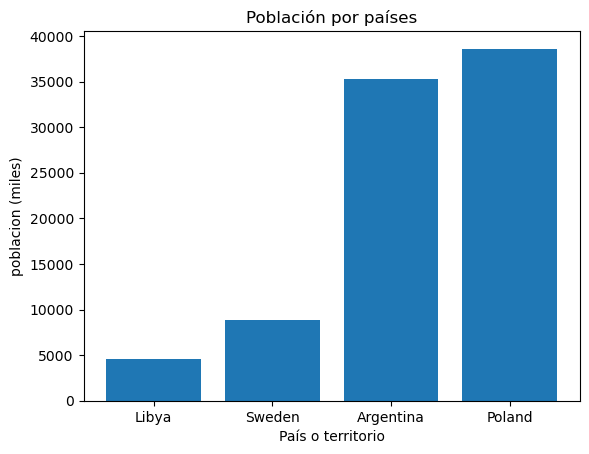

In [13]:
# Mediante la función plt.bar() de la librería matplotlib

# Obtenemos los datos y los ordenamos por valor
poblacion_1995 = datos_por_fechas.loc[['Argentina', 'Sweden', 'Poland', 'Libya'], '1995']
poblacion_1995 = poblacion_1995.sort_values()

# Creamos el diagrama de barras con plt de matplotlib
plt.bar(poblacion_1995.index, poblacion_1995.values)

# Definimos las etiquetas de los ejes
plt.xlabel('País o territorio')
plt.ylabel('poblacion (miles)')
plt.title('Población por países')
plt.show()

Text(0.5, 0, 'País (o territorio dependiente)')

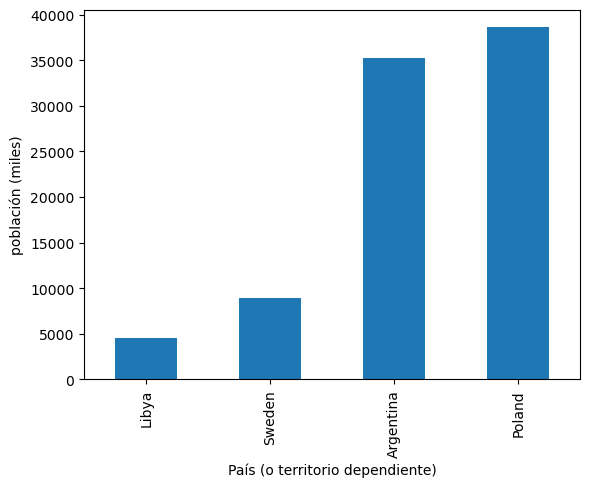

In [14]:
# Mediante la función data.plot(kind='bar') de la librería pandas

# Usamos los datos poblacion_1995 creados para el anterior grafico 

# Utilizamos la función .plot(kind='bar') de pandas para dibujar    
poblacion_1995.plot(kind='bar')

# Podemos utilizar plt.ylabel() para especificar 'población (miles)'
plt.ylabel('población (miles)')

# Podemos utilizar plt.xlabel() para especificar 'País (o territorio dependiente)'
plt.xlabel('País (o territorio dependiente)')

## Dibujar la evolución de la población de 4 países
Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

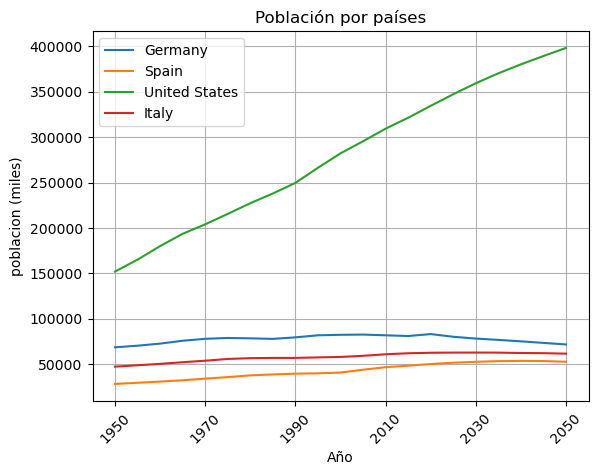

In [15]:
# Mediante la función plot de las librerías matplotlib

# Generamos una lista con los nombres de los países del enunciado
paises_seleccionados = ['Germany', 'Spain', 'United States', 'Italy']

# Generamos la subtabla correspondiente con la opción .loc
evolucion = datos_por_fechas.loc[paises_seleccionados]
evolucion = evolucion.T
    
# Creamos el grafico de evolucion con plt de matplotlib
plt.plot(evolucion.index, evolucion.values)

# Etiquetamos los ejes
plt.title('Población por países')
plt.ylabel('poblacion (miles)')
plt.xlabel('Año')

# Para mejorar la legibilidad mostramos solo 1 de 4 años
plt.xticks(evolucion.index[::4], rotation=45)

# Añadimos la leyenda a la figura con las etiquetas de los paises
plt.legend(labels=paises_seleccionados)

# Habilitamos la cuadrícula de fondo
plt.grid(True)

plt.show()

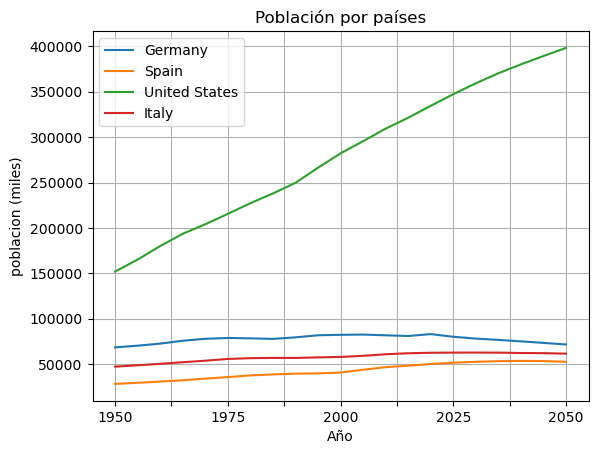

In [16]:
# Mediante la función data.plot(kind='line') de la librería pandas

# Usamos los datos evolucion creados para el anterior grafico
    
# Utilizamos la función plot(kind='line') para dibujar
evolucion.plot(kind='line')

# Añadimos la leyenda a la figura
plt.legend()

# Etiquetamos los ejes
plt.title('Población por países')
plt.xlabel('Año')
plt.ylabel('poblacion (miles)')
    
# Habilitamos la cuadrícula de fondo
plt.grid(True)

## Dibujar la evolución de los 5 países más populosos hasta 2010 y 2050  
Dibujar dos gráficas: una con la evolución para todo el período de los 5 países más populosos en 2010, y otra con los 5 países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

In [17]:
# Primero creo un nuevo set de datos sin los valores mundiales
if 'World' in datos_por_fechas.index:
    datos_por_fechas = datos_por_fechas.drop('World')

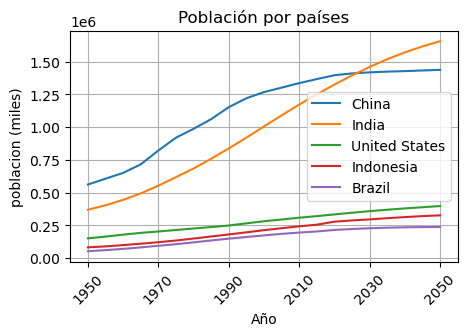

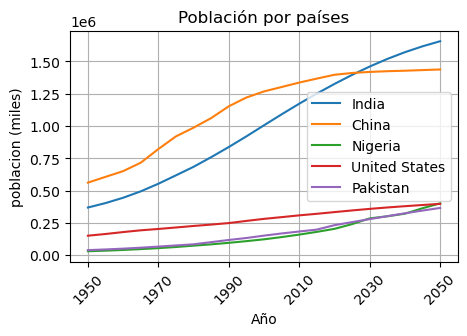

In [18]:
# Mediante la función plot de las librerías matplotlib
def plot_populosos(tabla, ano):
    # Ordenamos la tabla según el año
    tabla_ordenada = tabla.sort_values(by=str(ano), ascending=False)
    
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    top5 = tabla_ordenada.iloc[:5]
    nombres_top5 = top5.index
    
    # Utilizamos los nombres para invocar la subtabla mediante .loc y dibujamos mediante plot(kind='line')
    evolucion = tabla.loc[nombres_top5, :].T
    plt.plot(evolucion)

    # Añadimos las fechas a la figura
    plt.legend(labels=nombres_top5)

    # Etiquetamos los ejes
    plt.title('Población por países')
    plt.ylabel('poblacion (miles)')
    plt.xlabel('Año')
    
    # Establecemos un tamaño limitado para la figura
    plt.gcf().set_size_inches(5, 3)
    
    # Para mejorar la legibilidad mostramos solo 1 de 4 años
    plt.xticks(evolucion.index[::4], rotation=45)
    
    # Habilitamos la cuadrícula de fondo
    plt.grid(True)
    
    plt.show()


plot_populosos(datos_por_fechas, '2010')
plot_populosos(datos_por_fechas, '2050')

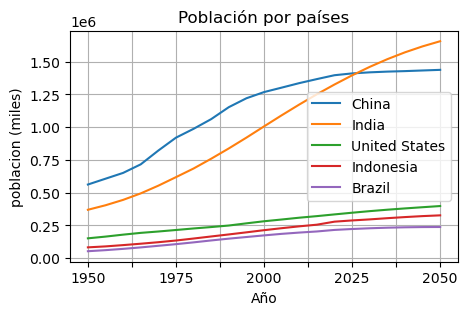

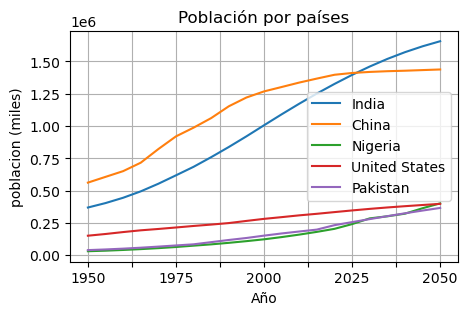

In [19]:
# Definimos la funión plot_populosos()
def plot_populosos(tabla, ano):
    
    # Ordenamos la tabla según el año
    tabla_ordenada = tabla.sort_values(by=str(ano), ascending=False)
    
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    top5 = tabla_ordenada.iloc[:5]
    nombres_top5 = top5.index
    
    # Utilizamos los nombres para invocar la subtabla mediante .loc y dibujamos mediante plot(kind='line')
    evolucion = tabla.loc[nombres_top5, :].T
    evolucion.plot(kind='line')
    
    # Añadimos las fechas a la figura
    plt.legend()

    # Etiquetamos los ejes
    plt.title('Población por países')
    plt.ylabel('poblacion (miles)')
    plt.xlabel('Año')
    
    # Establecemos un tamaño limitado para la figura
    plt.gcf().set_size_inches(5, 3)
    
    # Habilitamos la cuadrícula de fondo
    plt.grid(True)
    
    plt.show()
    
plot_populosos(datos_por_fechas, '2010')
plot_populosos(datos_por_fechas, '2050')